# BI Discussion Submissions – Analysis Notebook
**Author:** Abdellah Boudlal  
**Created:** 2025-10-27 21:19

This notebook loads the cleaned CSV and analyzes how many times each option is repeated in:
- `activity_1`
- `activity_2`
- `activity_3`
- `tool_not_now`

> ⚙️ **Instructions:** Put your CSV in the same folder as this notebook and name it `bi_discussion_submissions.csv`.  
If your file has a different name or location, change the `csv_path` variable below.


## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


# Configure pandas display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)




## 2. Load Data

In [2]:
# Read CSV
df = pd.read_csv('bi_discussion_submissions.csv')

# Show basic info
print("Shape:", df.shape)
df.head(15)


Shape: (20, 5)


,name,activity_1,activity_2,activity_3,tool_not_now
0,Derek\nWhy do YOU think being able to determin...,NaN,NaN,NaN,NaN
1,Adam\n\n2.,Data visualization\n\n3.,Data transformation\n\n4.,Dashboard creation\n\n5.,Apache Hadoop\n\n8.
2,Adam\n\n2. Why do YOU think being able to dete...,NaN,NaN,NaN,NaN
3,Teja\nWhy do YOU think being able to determine...,NaN,NaN,NaN,NaN
4,Teja,Data Visualization,Data Cleaning,Predictive Analytics,Qlik Sense
5,Micah\nWhy do YOU think being able to determin...,NaN,NaN,NaN,NaN
6,Micah Emily,Machine Learning,Data Analysis,Real-Time Processing,Shiny
7,sabri \nWhy do YOU think being able to determi...,NaN,NaN,NaN,NaN
8,sabri,Data Visualization,Data Transformation,Data Analysis & Reporting,Apache Spark
9,Reese,Machine Learning,Real-Time Processing,Integration,Looker


## 3. Basic Cleaning (trim spaces, unify missing)

In [3]:
# Strip whitespace on all string columns and standardize blanks to NaN
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace({'': np.nan, 'nan': np.nan, 'None': np.nan})

# Drop fully-empty rows across the key columns
key_cols = ['activity_1', 'activity_2', 'activity_3', 'tool_not_now']
existing_cols = [c for c in key_cols if c in df.columns]
df = df.dropna(how='all', subset=existing_cols)

df.head(20)


,name,activity_1,activity_2,activity_3,tool_not_now
1,Adam\n\n2.,Data visualization\n\n3.,Data transformation\n\n4.,Dashboard creation\n\n5.,Apache Hadoop\n\n8.
4,Teja,Data Visualization,Data Cleaning,Predictive Analytics,Qlik Sense
6,Micah Emily,Machine Learning,Data Analysis,Real-Time Processing,Shiny
8,sabri,Data Visualization,Data Transformation,Data Analysis & Reporting,Apache Spark
9,Reese,Machine Learning,Real-Time Processing,Integration,Looker
11,Kim Hummel,Data Analysis,Data Visualization,Data Transformation,Shiny
12,Femi,Data Collection,Data Cleaning,Data Transformation,Looker (Google)
14,Chris Braun,Machine Learning,Data Analysis,Data Visualization,I don't know that there is a need for me to le...
16,Virginia Malik,Data Visualization,Data Analysis,Data Cleaning,"I HATE Python, but I know I need to learn it....."
17,Kevin,Data Cleaning,Data Visualization,Scalability,Oracle BI


## 4. Summary of Columns

In [4]:
df.describe(include='all').T

,count,unique,top,freq
name,12,12,Adam\n\n2.,1
activity_1,12,7,Data Visualization,3
activity_2,12,7,Data Cleaning,3
activity_3,12,10,Data Transformation,2
tool_not_now,12,10,Oracle BI,2


## 5. Frequency Counts by Column

In [5]:
def value_counts_sorted(series):
    s = series.dropna().astype(str).str.strip()
    s = s[s.ne('')]
    counts = s.value_counts().sort_values(ascending=False)
    return counts.to_frame(name='count')

cols_to_check = ['activity_1', 'activity_2', 'activity_3', 'tool_not_now']
[ c for c in cols_to_check if c not in df.columns ]


[]

### 5.1 — `activity_1` counts

In [6]:
if 'activity_1' in df.columns:
    counts_activity_1 = value_counts_sorted(df['activity_1'])
    display(counts_activity_1)
else:
    print("Column 'activity_1' not found in the CSV.")


,count
activity_1,
Data Visualization,3
Machine Learning,3
Data Collection,2
Data visualization\n\n3.,1
Data Analysis,1
Data Cleaning,1
Data Cleaning.,1


<Figure size 800x400 with 0 Axes>

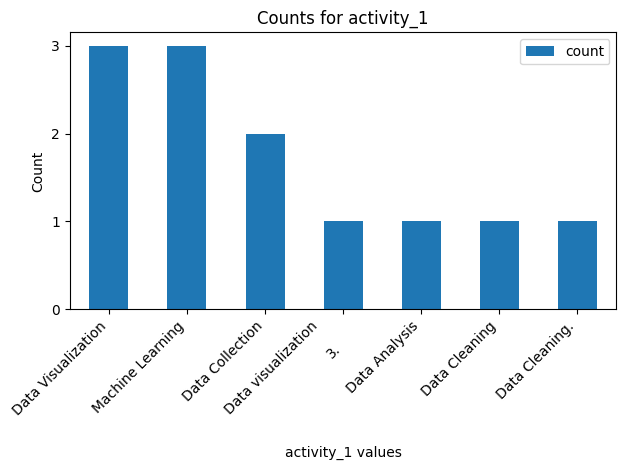

In [7]:
if 'activity_1' in df.columns:
    counts = value_counts_sorted(df['activity_1'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for activity_1")
    plt.xlabel("activity_1 values")
    plt.ylabel("Count")    
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )
  
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


### 5.2 — `activity_2` counts

In [8]:
if 'activity_2' in df.columns:
    counts_activity_2 = value_counts_sorted(df['activity_2'])
    display(counts_activity_2)
else:
    print("Column 'activity_2' not found in the CSV.")




,count
activity_2,
Data Cleaning,3
Data Analysis,3
Data Visualization,2
Data transformation\n\n4.,1
Data Transformation,1
Real-Time Processing,1
Data Analysis.,1


<Figure size 800x400 with 0 Axes>

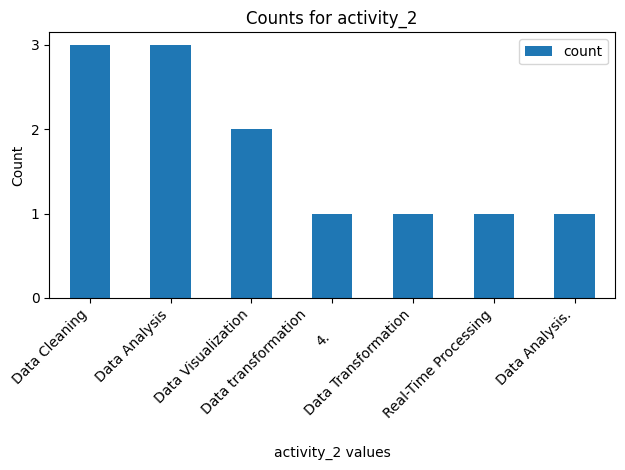

In [9]:
if 'activity_2' in df.columns:
    counts = value_counts_sorted(df['activity_2'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for activity_2")
    plt.xlabel("activity_2 values")
    plt.ylabel("Count")
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

### 5.3 — `activity_3` counts

In [10]:
if 'activity_3' in df.columns:
    counts_activity_3 = value_counts_sorted(df['activity_3'])
    display(counts_activity_3)
else:
    print("Column 'activity_3' not found in the CSV.")


,count
activity_3,
Data Transformation,2
Real-Time Processing,2
Predictive Analytics,1
Dashboard creation\n\n5.,1
Data Analysis & Reporting,1
Integration,1
Data Visualization,1
Data Cleaning,1
Scalability,1


<Figure size 800x400 with 0 Axes>

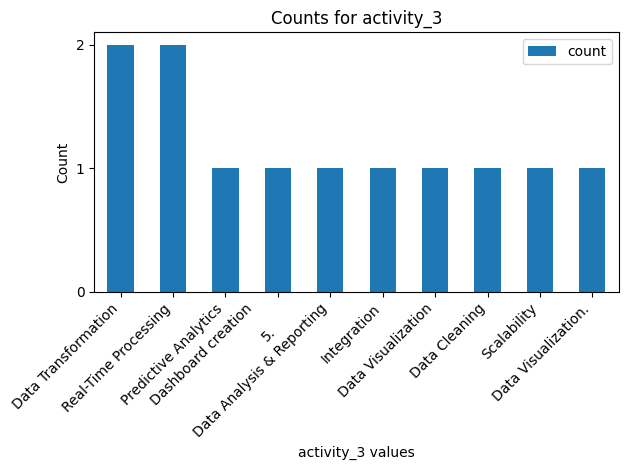

In [15]:
if 'activity_3' in df.columns:
    counts = value_counts_sorted(df['activity_3'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for activity_3")
    plt.xlabel("activity_3 values")
    plt.ylabel("Count")
    plt.xticks(
        ticks=range(len(counts.index)),
        labels=counts.index,
        rotation=45, ha='right'
    )

    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()


### 5.4 — `tool_not_now` counts

In [12]:
if 'tool_not_now' in df.columns:
    counts_tool_not_now = value_counts_sorted(df['tool_not_now'])
    display(counts_tool_not_now)
else:
    print("Column 'tool_not_now' not found in the CSV.")


,count
tool_not_now,
Oracle BI,2
Shiny,2
Qlik Sense,1
Apache Hadoop\n\n8.,1
Looker,1
Apache Spark,1
Looker (Google),1
I don't know that there is a need for me to learn metabase.,1
"I HATE Python, but I know I need to learn it...but I hate it.",1


<Figure size 800x400 with 0 Axes>

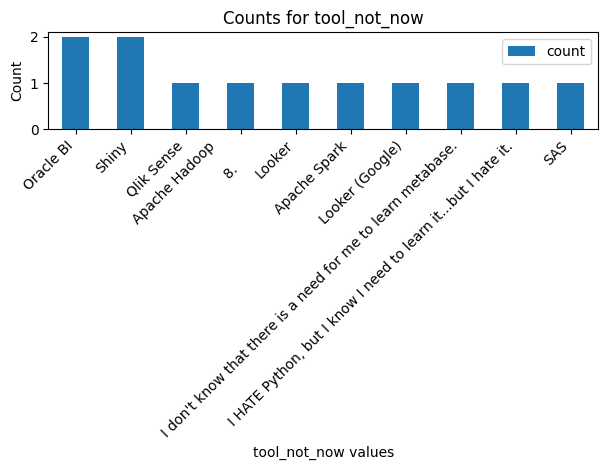

In [13]:
if 'tool_not_now' in df.columns:
    counts = value_counts_sorted(df['tool_not_now'])
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.title("Counts for tool_not_now")
    plt.xlabel("tool_not_now values")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## 6. Combined Summary Table (All Columns)

In [14]:
summary_list = []
for c in cols_to_check:
    if c in df.columns:
        vc = value_counts_sorted(df[c]).rename(columns={'count': c})
        vc.index.name = 'value'
        summary_list.append(vc)

# Join on index (value) to compare side-by-side
from functools import reduce
if summary_list:
    combined = reduce(lambda left, right: left.join(right, how='outer'), summary_list).fillna(0).astype(int)
    combined = combined.sort_index()
    display(combined)
else:
    print("No target columns found to summarize.")


,activity_1,activity_2,activity_3,tool_not_now
value,,,,
Apache Hadoop\n\n8.,0,0,0,1
Apache Spark,0,0,0,1
Dashboard creation\n\n5.,0,0,1,0
Data Analysis,1,3,0,0
Data Analysis & Reporting,0,0,1,0
Data Analysis.,0,1,0,0
Data Cleaning,1,3,1,0
Data Cleaning.,1,0,0,0
Data Collection,2,0,0,0
